# <font color="red"><b>(Lecture 3) Recurrent Neural Networks & Embeddings</b></font>
<font color="red">Natural Language Processing with RNNs - Toxic Comment Classification</font>

### <font color="#FF00FF">*Natural Language Processing: Zero to NLP*</font>

[Lecture Video](https://www.youtube.com/watch?v=Yqz1hGdd9J0)

[Kaggle Competition Site](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/rules)

[My Code on Lightning.ai](https://lightning.ai/henrykohl/vision-model/studios/toxic-comment-classification-challenge/code)

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

* <font color="red">要先上傳`kaggle.json`到`Colab`</font>
* <font color="red">若要快速一點,切換到`Build a Recurrent Neural Network`中`開始執行LIGHTNING`的**cell**,**執行上方儲存格**後,再往下執行後續的**cells**</font>

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [1]:
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [3]:
# pip install kaggle --upgrade ## Lightning.ai 需要安裝

In [4]:
!chmod 600 ./kaggle.json # 新增
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 91% 48.0M/52.6M [00:00<00:00, 167MB/s]
100% 52.6M/52.6M [00:00<00:00, 167MB/s]


In [5]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [6]:
import pandas as pd

In [7]:
raw_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')
sub_df = pd.read_csv('data/sample_submission.csv.zip')

In [8]:
# raw_df

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
raw_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
47073,7dc36fbae7208159,"Well, all right, let the information stay. I ...",0,0,0,0,0,0
101271,1e200bd48692da24,This IP address is shared amongst users of Vod...,0,0,0,0,0,0
141394,f46f28dd3bd22e4a,"""\nWe beg you to stop ruining the hard work of...",0,0,0,0,0,0
80619,d7aeea9a8f3e91b0,"So, if I were to run rampant throughout Wikipe...",0,0,0,0,0,0
58363,9c3990cc7aecd0cd,"wikipedia, the encyclopedia that NOBODY can ed...",0,0,0,0,0,0
92412,f71960f33ed0cef1,"Clone Wars edit \n\nHey, remember me? ) I fina...",0,0,0,0,0,0
86296,e6cfe09510b15145,and are Angelique KKKarrington-hating Jews!]],1,0,0,0,0,0
32978,57c1e4c39c85ef25,"""\n\nThanks\nHi. Thanks for fixing my messed-u...",0,0,0,0,0,0
41689,6f3714129447413a,"""\n\n Please stop. If you continue to vandaliz...",0,0,0,0,0,0
158380,ecd6104f22bb5ef9,technocracy movement\n\nI feel like I have bro...,0,0,0,0,0,0


In [11]:
raw_df.comment_text.values[0] ## 等於 raw_df.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [12]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [13]:
for col in target_cols:
    print(raw_df[col].value_counts(normalize=True)) ## 可以看到，資料中決大部分的值是`0',極少數的才是`1'

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [14]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [15]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

[build_vocab_from_iterator的參數介紹以及使用](https://www.cnblogs.com/Fortunater/p/16971419.html)

In [16]:
# !pip install torchtext --quiet ## 在  Lightning.ai 需要安裝

In [17]:
from torchtext.data.utils import get_tokenizer

In [18]:
tokenizer = get_tokenizer('basic_english')

In [19]:
sample_comment = raw_df.comment_text.values[0]

In [20]:
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [21]:
sample_comment_tokens = tokenizer(sample_comment) # tokenizer針對一個句子,化成a list of tokens
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [22]:
from torchtext.vocab import build_vocab_from_iterator

In [23]:
comment_tokens = raw_df.comment_text.map(tokenizer) # Series 類型

In [24]:
comment_tokens # 每一個row是 a list of tokens

0         [explanation, why, the, edits, made, under, my...
1         [d, ', aww, !, he, matches, this, background, ...
2         [hey, man, ,, i, ', m, really, not, trying, to...
3         [more, i, can, ', t, make, any, real, suggesti...
4         [you, ,, sir, ,, are, my, hero, ., any, chance...
                                ...                        
159566    [and, for, the, second, time, of, asking, ,, w...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, ,, theres, no, actual, article,...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, ., ., ., i, really, don, ', t, think, yo...
Name: comment_text, Length: 159571, dtype: object

In [25]:
VOCAB_SIZE = 1500

In [26]:
unk_token = '<unk>'
pad_token = '<pad>'

In [27]:
vocab = build_vocab_from_iterator(comment_tokens,            # Iterator
                   specials=[unk_token, pad_token],   # 特殊標誌，字符串列表
                   max_tokens=VOCAB_SIZE)         # 限制這個詞典的最大長度

<font color="red">補充</font>

```python
vocab.get_itos() # list
vocab.get_stoi() # dict
```



In [28]:
vocab[unk_token]

0

In [29]:
vocab.set_default_index(vocab[unk_token]) # 設置默認索引，若是索引的單詞不在詞典内，則返回與<unk>對應的index

In [30]:
vocab['this']

18

In [31]:
vocab['harcore'] # 'harcore'不在詞典中

0

In [32]:
sample_indices = vocab.lookup_indices(sample_comment_tokens) # 把sample_comment_tokens中的每一個token對應到詞典中的index列出
sample_indices[:10]

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

<font color="red">sample_comment_tokens[:10]的最後兩個tokens是 `'hardcore'`,`'metallica'`，因為這兩個token不在所建立的詞典中(token出現次數太少，不被包含在詞典中)，所以被`'<unk>'`所替代，因此，回傳的index都是 0 ~~

In [33]:
sample_comment_recovered = vocab.lookup_tokens(sample_indices) # 把sample_indices中的每一個index對應到詞典中的token列出
sample_comment_recovered[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 '<unk>',
 '<unk>']

<font color="red">`build_vocab_from_iterator()`的第一個參數要Iterator，所以Seriers是沒問題的，Series中每一個index，對應 a list of tokens，而且，`build_vocab_from_iterator()`的第一個參數也可以是 a list of a list of tokens(例如:[["token1","token2",...],[],...])，也是沒問題的，下列示範，兩者輸出結果(vtem1 vs. vtem2)是一樣的~</font>

```python
"""用raw_df的comment_text欄位的前兩筆資料(句子)來測試"""

vtem1 = build_vocab_from_iterator(comment_tokens[:2],
                   specials=[unk_token, pad_token],
                   max_tokens=VOCAB_SIZE)
# comment_tokens[:2] 是 Series of a list of tokens
vtem1.get_itos()
vtem1.get_stoi()

def sentoks(text):
  tks = []
  for sent in text: # text 是 a list of 句子(s)
    tks.append(tokenizer(sent))
  return tks
twosents = sentoks(raw_df.comment_text.values[:2])
# twosents 是 a list of a list of tokens
vtem2 = build_vocab_from_iterator(twosents,
                   specials=[unk_token, pad_token],
                   max_tokens=VOCAB_SIZE)

vtem2.get_itos()
vtem2.get_stoi()
```
<font color="red">注意，`build_vocab_from_iterator()`的第一個參數如果是a list of tokens(例如:["token1","token2",...])，輸出的token將會是字元(char)，而不是單詞(word)，示範如下</font>
```python
vtemc = build_vocab_from_iterator(comment_tokens.iloc[0],
                   specials=[unk_token, pad_token],
                   max_tokens=VOCAB_SIZE)
vtemc.get_itos(), vtemc.get_stoi() # 結果與vtem1或vtem2，明顯不同樣                   
```
<font color="red">若改用
```python
vtemc = build_vocab_from_iterator([comment_tokens.iloc[0]],
                   specials=[unk_token, pad_token],
                   max_tokens=VOCAB_SIZE)
# vtemc 結果與vtem1或vtem2，就會雷同                   
```



### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

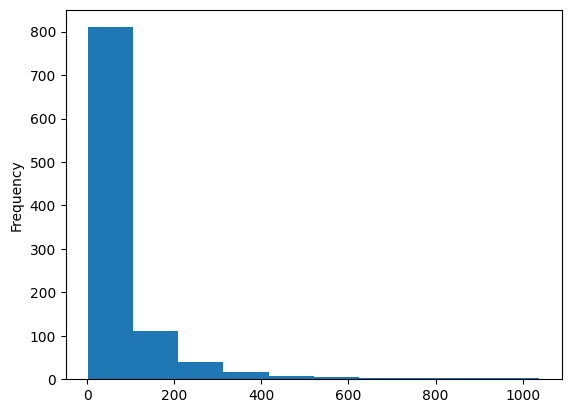

In [34]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).plot(kind='hist'); # x軸代表len長度，y軸代表不同len長度發生的次數
# raw_df.comment_text 取出 Series
# raw_df.comment_text.sample(1000) 取出 Series 的前1000筆
# raw_df.comment_text.sample(1000).map(tokenizer) 將這1000筆中的每一筆轉成a list of token
# raw_df.comment_text.sample(1000).map(tokenizer).map(len) 每一筆(a list of token)轉化成此list長度

In [35]:
MAX_LENGTH = 150

In [36]:
"""RNN使用的input tokens長度，是固定的"""
def pad_tokens(tokens):
    if (len(tokens) >= MAX_LENGTH):
        return tokens[:MAX_LENGTH]
    else:
        return tokens + [pad_token] * (MAX_LENGTH - len(tokens))

In [37]:
# 測試用，要設定MAX_LENGTH = 4
# pad_tokens(tokenizer("I love this"))

In [38]:
# 測試用，要設定MAX_LENGTH = 4
# pad_tokens(tokenizer("This is great, is it not?"))

In [39]:
import torch

In [40]:
from torch.utils.data import Dataset

* <font color="red">以下`class JigsawDataset(Dataset)`用來建立自訂的`DataSet`</font>

In [41]:
class JigsawDataset(Dataset):
  # 自行測試
  # def __new__(cls, df): # cls 後的參數與__init__的self之後是相同的（不必含參數有給定default value）
  #   print('__new__', type(super().__new__(cls)))
  #   return super().__new__(cls)

  def __init__(self, df, is_test=False):
    self.df = df
    self.is_test = is_test

  """用於 `建立的JigsawDataset物件+[指定index]` """
  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index] # 取出sentence
    # self.df 是DataFrame
    # self.df.comment_text 是Series
    # self.df.comment_text.values 轉Series為array
    comment_tokens = pad_tokens(tokenizer(comment_text))
    # comment_tokens 是一定長度的tokens
    input = torch.tensor(vocab.lookup_indices(comment_tokens))
    # input 是 a list of indices
    if self.is_test:
      target = torch.tensor([0,0,0,0,0,0]).float()
    else:
      target = torch.tensor(self.df[target_cols].values[index]).float()
    return input, target

  """用於`len(建立的JigsawDataset物件)`"""
  def __len__(self):
    return len(self.df)

In [42]:
# raw_df[target_cols].values[0] ## 等於 raw_df[target_cols].loc[0].values
## DataFrame.values 是把 df 中 value 取出,不含所引與columns

In [43]:
# raw_df.comment_text.iloc[1]

In [44]:
raw_ds = JigsawDataset(raw_df)
# len(raw_ds) ## 測試用

In [45]:
raw_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [46]:
raw_ds[0] # 使用 __getitem__()

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [47]:
from torch.utils.data import random_split

In [48]:
VAL_FRAC = 0.25

In [49]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [50]:
len(raw_ds), len(train_ds), len(val_ds)

(159571, 119679, 39892)

In [51]:
test_ds = JigsawDataset(test_df, is_test=True)

In [52]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [53]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

```python
type(test_ds)         # test_ds類 的 型態
type(test_ds).__bases__    # test_ds父類 的 型態
```



### Create PyTorch Dataloaders

In [54]:
from torch.utils.data import DataLoader

In [55]:
BATCH_SIZE = 256

In [56]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [57]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])


## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [58]:
import torch.nn as nn
import torch.functional as F

In [59]:
vocab[pad_token]

1

In [60]:
emb_layer = nn.Embedding(VOCAB_SIZE, 256, 1)

<font color="green">
num_embeddings(詞典長度) = VOCAB_SIZE, <br>
embedding_dim(向量維度) = 256, <br>
padding_idx(填充的參數索引) = 1

In [61]:
emb_layer ## shape 是 [1500,256]

Embedding(1500, 256, padding_idx=1)

In [62]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

<font color="green">
input_size = 256 <br>
hidden_size = 128 <br>
num_layers = 1 <br>
batch_first = True (default: False) <br>


In [63]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)   # batch = 256, tokens(seq_len) = 150
    print('b_targets.shape', b_targets.shape) # batch = 256, 輸出類別數 = 6

    emb_out = emb_layer(b_inputs)
    print('emb_out.shape', emb_out.shape)   # batch =256, tokens(seq_len) = 150, input_size(for rnn) = 256

    rnn_out, hn = rnn_layer(emb_out)     # h_0 使用 default 提供的
    print('rnn_out.shape', rnn_out.shape)   # batch =256, tokens(seq_len) = 150, hidden_size(rnn) = 128
    print('hn.shape', hn.shape)        # num_layers = 1, batch = 256, hidden_size = 128

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
emb_out.shape torch.Size([256, 150, 256])
rnn_out.shape torch.Size([256, 150, 128])
hn.shape torch.Size([1, 256, 128])


---
### <font color="brown">開始使用**`LIGHTNING`**</font>
* <font color="brown">這裡使用**binary cross entropy**原因是,此問題不是multi-class classification,而是multi-label classification, 前者需要使用normal Cross Entropy,後者則是一整個row上,對於每一個class都可以獨立判斷,因此就用**binary cross entropy**</font>


#### <font color="red">原 Lecture 版本,使用`pytorch_lightning`,然而不管用`1.6.0`版,或是`2.0以上`版本,都會遇到下列問題:</font>
* <font color="red">訓練到到`Epoch 1`接近`18%`時,報錯`RuntimeError: value cannot be converted to type float without overflow`</font>
* <font color="red">`2.0以上`版本,`Trainer`的`auto_lr_find`已經被移除,不能用</font>
* <font color="red">`class JigsawModel`中, (1)`def training_step`, (2)`def validation_step`,與 (3)`def validation_epoch_end`的簡要說明如下:</font>
> * <font color="red">(1):計算(training dataset中每一個**batch**) loss, 然後**Lightning**(自動)根據loss調整模型,使得模型越來越好
> * (2):只計算(validation dataset中每一個**batch**) loss,在對所有**batch**計算完後,**Lightning**(自動)會將這些loss,組成一個**list**, 將其傳遞到`def validation_epoch_end`
> * (3):會接收到來自`def validation_step`的**list**,也就是參數   **validation_step_outputs**,這裡是利用**validation_step_outputs**算出平均後顯示其結果</font>

In [ ]:
# !pip install pytorch_lightning --quiet ## 使用Colab 最新版 pytorch_lightning(但auto_lr_finder不能用)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [64]:
!pip install pytorch_lightning==1.6.0 --quiet # (auto_lr_finder可以用)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.1/582.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [65]:
import pytorch_lightning as pl

In [ ]:
import torch.nn.functional as F

In [67]:
import numpy as np

In [68]:
class JigsawModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)     ## 同前述設定
    self.lstm = nn.LSTM(256, 128, 1, batch_first=True) ## 同RNN設定: input--256, hidden--128, num_layers=1
    self.linear = nn.Linear(128, 6)            ## 一層全連接: input--128, output--6
    self.learning_rate = 0.001               ## 學習率: 0.001

  def forward(self, x):       ## x為inputs,大小(Batch=256, SeqLen=150)
    """ x的shape是[256,150] """
    out = self.emb(x)       ## emb的輸出為256(輸入為1500，因為詞典的詞彙量設為1500)
                     ## x輸入emb是,每一個value會先轉換成one-hot-encoding的形式，shape是[1500]
    """out 的 shape 是 [256,150,256]"""
    out, hn = self.lstm(out)   ## hn是tuple,因為是lstm, hn實際上是(hn,cn)
    """out 的 shape 是 [256, 150, 128], hn與cn 的 shape 是 [1, 256, 128]; 1 是 num_layers"""
    out = F.relu(out[:,-1,:])   ## 所有batch, 最後一個time step的輸出, 的所有(128)維度的值
    """out 的 shape 是 [256,128]"""
    out = self.linear(out)     ## 輸入128，輸出6
    """out 的 shape 是 [256,6]"""
    return out

  def training_step(self, batch, batch_idx):
    inputs, targets = batch
    """inputs 的 shape 是 [256,150], targets 的 shape 是 [256,6]  """
    outputs = self(inputs)
    """outouts 的 shape 是 [256,6]"""
    probs = torch.sigmoid(outputs)
    """probs 的 shape 是 [256,6]"""
    loss = F.binary_cross_entropy(probs, targets)
    """loss 的  shape 是 []"""
    return loss

  def validation_step(self, batch, batch_idx):
    inputs, targets = batch
    outputs = self(inputs)
    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, targets)
    return loss.item()

  def validation_epoch_end(self, validation_step_outputs):
    loss = np.mean(validation_step_outputs)
    print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, loss))

  def predict_step(self, batch, batch_idx): ## 用在 test dataset
    inputs, targets = batch
    outputs = self(inputs)
    probs = torch.sigmoid(outputs)
    return probs

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [69]:
model = JigsawModel()

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    outputs = model(b_inputs) ## 使用 model 中的 forward,而不是predict_step
    print('outputs.shape', outputs.shape)

    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, b_targets)
    print('Loss', loss)
    break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.6930, grad_fn=<BinaryCrossEntropyBackward0>)


#### <font color="red">使用`lightning`2.0以上版本,不需要是`downgrade`版本(自行修改成)</font>
* <font color="red">在使用`Trainer`進行訓練時,不會報錯,成功訓練模型</font>
* <font color="red">使用`lr_finder`,成功正確地找到`Learning Rate`</font>
* <font color="red">`Lightning`或`pytorch_lightning`版本在`2.0`以上的`def validation_epoch_end`已經不再使用,取而代之的是`def on_validation_epoch_end`</font>
* <font color="red">`def validation_epoch_end`可以接受兩個參數`self`與`validation_step_outputs`,**validation_step_outputs**名稱可以自訂，也就是來是`def validation_step`的回傳值</font>
* <font color="red">然而`on_validation_epoch_end`只能接受`self`參數,因此要在`def __init__(self)`中,建立`self.validation_step_outputs = []`,`def validation_step`的回傳值,先存到`self.validation_step_outputs`中,之後`def validation_epoch_end`就可以去讀取`self.validation_step_outputs`來使用。</font>

In [64]:
!pip install lightning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [65]:
import lightning as L

In [66]:
import torch.nn.functional as F

In [67]:
import numpy as np

In [68]:
class JigsawModel(L.LightningModule):
  def __init__(self):
    super().__init__()
    self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)     ## 同前述設定
    self.lstm = nn.LSTM(256, 128, 1, batch_first=True) ## 同RNN設定: input--256, hidden--128, num_layers=1
    self.linear = nn.Linear(128, 6)            ## 一層全連接: input--128, output--6
    self.learning_rate = 0.001               ## 學習率: 0.001
    self.validation_step_outputs = [] ## Lightning 2.0

  def forward(self, x):                 ## x為inputs,大小(Batch=256, SeqLen=150)
    """ x的shape是[256,150] """
    out = self.emb(x)              ## x輸入emb時,每一個value會先轉換成one-hot-encoding的形式，shape是[1500]
                            ## emb的輸出為256(輸入為1500，因為詞典的詞彙量設為1500)
    """out 的 shape 是 [256,150,256]"""
    out, hn = self.lstm(out)          ## hn是tuple,因為是lstm, hn實際上是(hn,cn)
    """out 的 shape 是 [256, 150, 128], hn與cn 的 shape 是 [1, 256, 128]; 1 是 num_layers"""
    out = F.relu(out[:,-1,:])          ## 所有batch(1維), 最後一個time step(2維)的輸出, (3維)所有(128)的值
    """out 的 shape 是 [256,128]"""
    out = self.linear(out)           ## 輸入128，輸出6
    """out 的 shape 是 [256,6]"""
    return out

  def training_step(self, batch, batch_idx):
    inputs, targets = batch
    """inputs 的 shape 是 [256,150], targets 的 shape 是 [256,6]  """
    outputs = self(inputs)
    """outouts 的 shape 是 [256,6]"""
    probs = torch.sigmoid(outputs)
    """probs 的 shape 是 [256,6]"""
    loss = F.binary_cross_entropy(probs, targets)
    """loss 的  shape 是 []"""
    return loss

  def validation_step(self, batch, batch_idx):
    inputs, targets = batch
    outputs = self(inputs)
    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, targets)

    log = {'val_loss': loss}        ## Lightning 2.0
    self.validation_step_outputs.append(log) ## Lightning 2.0

    return log                ## Lightning 2.0

  def on_validation_epoch_end(self):     ## Lightning 2.0, def validation_epoch_end(self, validation_step_outputs)
    outputs = self.validation_step_outputs
    mean_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
    self.log('val/loss', mean_loss, prog_bar=True)
    print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, mean_loss))

  def predict_step(self, batch, batch_idx): ## 用在 test dataset
    inputs, targets = batch
    outputs = self(inputs)
    probs = torch.sigmoid(outputs)
    return probs

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [69]:
model = JigsawModel()

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    outputs = model(b_inputs)    ## 使用  class JigsawModel 的 def forward
    print('outputs.shape', outputs.shape)

    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, b_targets)
    print('Loss', loss)
    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.6906, grad_fn=<BinaryCrossEntropyBackward0>)


## Train and Evaluate the Model

### <font color="red">原Lecture版本,使用`pytorch_lightning`1.6.0版本</font>

In [70]:
# trainer = pl.Trainer(max_epochs=3, accelerator='gpu', auto_lr_find=True) ## 用GPU
trainer = pl.Trainer(max_epochs=3, auto_lr_find=True)          ## 不用GPU

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [71]:
trainer.tune(model, train_dl)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_3c8bd6a7-b034-45e2-a403-143593987728.ckpt
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py:1721: UserWarning: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': None, 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None, 'save_on_train_epoch_end': None}"].
  rank_zero_warn(
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.006918309709189364


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7cb11180add0>}

* <font color="red">`UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.` -- 因為在`class JigsawModel`中沒有建立`def val_dataloader`之前,但已經先建立 validation dataloader,所以此提示可忽略  </font>
* <font color="red">`UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2` -- 因為在Colab中,只能用到`2 processes`,所以此提示可忽略</font>
* <font color="red">`UserWarning: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation.` -- 因為沒有設定`ckpt_path`,但不影響結果</font>

In [72]:
model.learning_rate

0.006918309709189364

In [ ]:
trainer.fit(model, train_dl, val_dl) ## 原 Lecture 版本提供的運行結果副本

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.691875 


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.073076 


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.065023 


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.064172 


In [ ]:
trainer.fit(model, train_dl, val_dl) ## 使用pytorch_lightning 1.6.0版本,實際運行結果,運行中出錯

INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.692300 


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 3.653370 


RuntimeError: value cannot be converted to type float without overflow

* <font color="red">此錯誤`RuntimeError: value cannot be converted to type float without overflow`不知為何？解決不了...(未解)</font>

### <font color="red">使用`lightning`2.0以上版本</font>
* 參考 [Decouple Tuner from Trainer ](https://github.com/Lightning-AI/pytorch-lightning/pull/16462)
* 參考 [Difference between pytorch lightning and lightning](https://github.com/Lightning-AI/pytorch-lightning/discussions/16688)

In [72]:
trainer = L.Trainer(max_epochs=3, accelerator='auto') ## 有使用GPU
# trainer = L.Trainer(max_epochs=3)          ## 沒使用GPU

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [73]:
tuner = L.pytorch.tuner.Tuner(trainer)

In [74]:
lr = tuner.lr_find(model, train_dl)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.006918309709189364
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.006918309709189364
INFO: Restoring states from the checkpoint path at /content/.lr_find_827a9702-677d-4098-b4db-5f851947a9c7.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_827a9702-677d-4098-b4db-5f851947a9c7.ckpt
INFO: Restored all states from the checkpoint at /content/.lr_find_827a9702-677d-4098-b4db-5f851947a9c7.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_827a9702-677d-4098-b4db-5f851947a9c7.ckpt


In [75]:
model.learning_rate # lr.suggestion(skip_begin=10) 有相同結果

0.006918309709189364

In [76]:
trainer.fit(model, train_dl, val_dl)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Epoch #0; Loss: 0.693701 


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #0; Loss: 0.086940 


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #1; Loss: 0.075296 


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.070772 


## Make Predictions & Submit

In [77]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
for batch in test_dl:
    b_inputs, b_targets = batch
    print('b_inputs.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)
    break

b_inputs.shape torch.Size([512, 150])
b_targets.shape torch.Size([512, 6])


In [78]:
test_preds = trainer.predict(model, test_dl) ## 使用class JigsawModel 中 def predict_step, 而 test_preds 是 list 類型

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Predicting: |          | 0/? [00:00<?, ?it/s]

In [79]:
test_preds = torch.cat(test_preds) # 把 list(tensor, tensor, ....) 變成 一個 tensor

In [ ]:
# len(test_preds), test_preds[0].shape, test_preds[-1].shape ## 測試用

In [80]:
test_preds.shape

torch.Size([153164, 6])

In [81]:
test_preds

tensor([[9.8121e-01, 2.5887e-01, 9.3852e-01, 1.8166e-02, 7.6115e-01, 9.3534e-02],
        [9.5141e-03, 5.2792e-05, 2.1963e-03, 5.7866e-05, 2.3358e-03, 3.9454e-04],
        [3.9400e-03, 1.8601e-05, 9.4185e-04, 2.9607e-05, 1.1157e-03, 2.1715e-04],
        ...,
        [7.1476e-03, 3.8222e-05, 1.5567e-03, 3.9919e-05, 1.6250e-03, 2.8811e-04],
        [3.8494e-03, 2.3151e-05, 1.0236e-03, 4.3728e-05, 1.2773e-03, 2.5860e-04],
        [7.8505e-01, 1.9315e-02, 3.8014e-01, 1.6230e-02, 3.0885e-01, 3.2920e-02]])

In [ ]:
test_probs = torch.sigmoid(test_preds) ## predict_step中已經使用了sigmoid, Lecture分別測試了增加這步驟與否,並不影響kaggle分數

In [82]:
sub_df[target_cols] = test_preds.detach().cpu().numpy() # test_probs (Lecture)

In [83]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.981210,0.258872,0.938525,0.018166,0.761148,0.093534
1,0000247867823ef7,0.009514,0.000053,0.002196,0.000058,0.002336,0.000395
2,00013b17ad220c46,0.003940,0.000019,0.000942,0.000030,0.001116,0.000217
3,00017563c3f7919a,0.005076,0.000024,0.001238,0.000038,0.001444,0.000269
4,00017695ad8997eb,0.012120,0.000073,0.002705,0.000064,0.002793,0.000449
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.084431,0.000567,0.019407,0.001121,0.014360,0.002107
153160,fffd7a9a6eb32c16,0.115520,0.000706,0.028403,0.001895,0.029111,0.004386
153161,fffda9e8d6fafa9e,0.007148,0.000038,0.001557,0.000040,0.001625,0.000288
153162,fffe8f1340a79fc2,0.003849,0.000023,0.001024,0.000044,0.001277,0.000259


In [84]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.72812605,0.5913613,0.7176182,0.51137114,0.70266306,0.56111944
0000247867823ef7,0.5016636,0.50002384,0.5003641,0.5000713,0.5005936,0.5002134
00013b17ad220c46,0.50239813,0.500031,0.5005862,0.5000803,0.50071675,0.5002376
00017563c3f7919a,0.501505,0.50002253,0.5003276,0.50006527,0.5005442,0.500191
00017695ad8997eb,0.50200754,0.5000269,0.50047714,0.50007606,0.50064564,0.5002039
0001ea8717f6de06,0.50149107,0.50002205,0.50032103,0.50006306,0.5005344,0.50018644
00024115d4cbde0f,0.5014186,0.5000208,0.50028896,0.5000587,0.500487,0.5001697
000247e83dcc1211,0.5343304,0.50087047,0.5057776,0.50117475,0.5125339,0.503937
00025358d4737918,0.50083727,0.5000131,0.50024486,0.5000303,0.50024164,0.5000872


* <font color="red">將`submission.csv`上傳到**`Kaggle`**</font>



---
* <font color="red">以下步驟,使用訓練完的模型,對10筆隨機資料進行預測</font>


In [93]:
sample_df = raw_df.sample(10)

In [94]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
146070,268dc27badae0ea8,so how do you tackle those that gang up agains...,0,0,0,0,0,0
19152,3291a540e58eff4b,"""\nThere has been a sockpuppetry investigation...",0,0,0,0,0,0
77614,cfeb43faca9f9fee,"""\n\nProblems with the new paragraphs\n\nIn ge...",0,0,0,0,0,0
136946,dcaac28236639048,"This really can't be the ultimate, definitive ...",0,0,0,0,0,0
108414,438f5becbb0d9026,"i used some, thank you.",0,0,0,0,0,0
126147,a29770fb703645fe,Good idea. Find a reference and either start ...,0,0,0,0,0,0
108989,46bf98bf21a3901b,Listen you sick fuck \n\nYou perverted freaksh...,1,0,1,0,1,0
144668,10abd2eedffc1791,A heads up\nI just wanted to let you know that...,0,0,0,0,0,0
110854,510bf59d0deed2c7,"It did, but I didn't mind being in the blue th...",0,0,0,0,0,0
102173,22cc4da620309f38,The mountains explanation makes a lot of sense...,0,0,0,0,0,0


In [95]:
sample_ds = JigsawDataset(sample_df) ## DataFrame 轉成 DataSet

In [96]:
sample_dl = DataLoader(sample_ds, batch_size=10) ## DataSet 轉成 DataLoader

In [98]:
sample_preds = trainer.predict(model, sample_dl)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [99]:
sample_probs = torch.sigmoid(sample_preds[0]) ## sample_preds[0]已經是 probability

In [100]:
(sample_probs > 0.6).int() ## (sample_preds[0] > 0.6).int()也可以

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [101]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
146070,268dc27badae0ea8,so how do you tackle those that gang up agains...,0,0,0,0,0,0
19152,3291a540e58eff4b,"""\nThere has been a sockpuppetry investigation...",0,0,0,0,0,0
77614,cfeb43faca9f9fee,"""\n\nProblems with the new paragraphs\n\nIn ge...",0,0,0,0,0,0
136946,dcaac28236639048,"This really can't be the ultimate, definitive ...",0,0,0,0,0,0
108414,438f5becbb0d9026,"i used some, thank you.",0,0,0,0,0,0
126147,a29770fb703645fe,Good idea. Find a reference and either start ...,0,0,0,0,0,0
108989,46bf98bf21a3901b,Listen you sick fuck \n\nYou perverted freaksh...,1,0,1,0,1,0
144668,10abd2eedffc1791,A heads up\nI just wanted to let you know that...,0,0,0,0,0,0
110854,510bf59d0deed2c7,"It did, but I didn't mind being in the blue th...",0,0,0,0,0,0
102173,22cc4da620309f38,The mountains explanation makes a lot of sense...,0,0,0,0,0,0
